<p><font size="6"><b>Visualization - Python's Visualization Landscape</b></font></p>

> *© 2021, Joris Van den Bossche and Stijn Van Hoey  (<mailto:jorisvandenbossche@gmail.com>, <mailto:stijnvanhoey@gmail.com>). Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

---

---
**Remark:**

Some Python visualization packages used in this notebook are not provided by default in the conda environment of the course. In case you want to try these features yourself, make sure to install these packages with conda.

To make some of the more general plotting packages available:

```
conda install -c conda-forge bokeh plotly altair hvplot holoviews
``` 

To have support of Bokeh inside the Jupyter Lab environment
```
conda install jupyter_bokeh
```

To have support of plotly inside the Jupyter Lab environment everything should be included as suc. However, when seeing only blank/empty space as output in the Jupyter lab environment. Close the Jupyter lab, run the command `jupyter lab build` from the command line and restart the Jupyter lab environment.

To run the large data set section, additional package installations are required:

```
conda install -c conda-forge datashader holoviews geoviews
```
---

## What have we done so far?

What we have encountered until now:

* [matplotlib](https://matplotlib.org/)
* [pandas .plot](https://pandas.pydata.org/pandas-docs/stable/visualization.html)
* [seaborn](https://seaborn.pydata.org/)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotnine as p9
import seaborn as sns

### When should I use Seaborn versus Matplotlib?

There is `titanic` data again...

In [2]:
titanic = pd.read_csv("data/titanic.csv")

Pandas/Matplotlib plot...

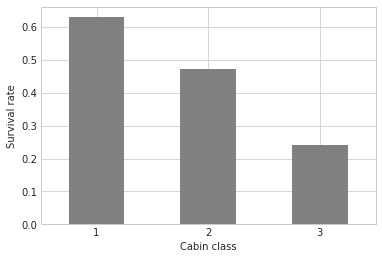

In [3]:
with plt.style.context('seaborn-whitegrid'):  # context manager for styling the figure
    
    fig, ax = plt.subplots()
    
    survival_rate = titanic.groupby("Pclass")['Survived'].mean()
    survival_rate.plot(kind='bar', color='grey', 
                       rot=0, figsize=(6, 4), ax=ax)
    
    ylab = ax.set_ylabel("Survival rate")
    xlab = ax.set_xlabel("Cabin class")

Using Seaborn:

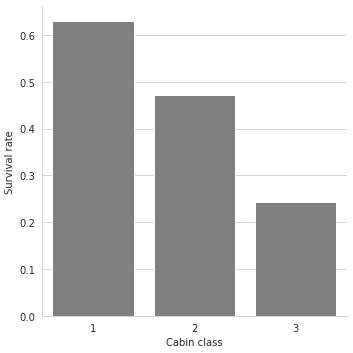

In [4]:
with sns.axes_style("whitegrid"):    # context manager for styling the figure
    
    g = sns.catplot(data=titanic, 
                    x="Pclass", y="Survived", 
                    kind="bar", estimator=np.mean,
                    ci=None, color="grey")
    
    g.set_axis_labels("Cabin class", "Survival rate")

An important difference is the *imperative* approach from `matplotlib` versus the *declarative* approach from `seaborn`:

| imperative | declarative |
|------------|-------------|
| Specify **how** something should be done |  Specify **what** should be done            |
| **Manually specify** the individual plotting steps | Individual plotting steps based on **declaration** |
| e.g. `for ax in axes: ax.plot(...` | e.g. `, col=my_variable` |

Which approach to use, is sometimes just a matter of personal preference... Although, take following elements into account:

* When your data consists of only **1 categorical variable**, such as

  | ID | variable 1 | variable 2 | variabel ... | 
  |------------|-------------| ---- | ----- |
  | 1 | 0.2 | 0.8 | ... |
  | 2 | 0.3 | 0.1 | ... |
  | 3 | 0.9 | 0.6 | ... |
  | 4 | 0.1 | 0.7 | ... |
  | ...  | ... | ... | ...|

  the added value of using Seaborn approach is LOW. Pandas `.plot()` will probably suffice.

* When working with **timeseries data** from sensors or continuous logging, such as

  | datetime | station 1 | station 2 | station ... | 
  |------------|-------------| ---- | ----- |
  | 2017-12-20T17:50:46Z | 0.2 | 0.8 | ... |
  | 2017-12-20T17:50:52Z | 0.3 | 0.1 | ... |
  | 2017-12-20T17:51:03Z | 0.9 | 0.6 | ... |
  | 2017-12-20T17:51:40Z | 0.1 | 0.7 | ... |
  | ...  | ... | ... | ...|

  the added value of using a grammar of graphics approach is LOW. Pandas `.plot()` will probably suffice.

* When working with different experiments, different conditions, (factorial) **experimental designs**, such as

  | ID | origin | addition (ml)  | measured_value | 
  |----|-----------| ----- | ------ |
  | 1  | Eindhoven | 0.3 | 7.2 |
  | 2  | Eindhoven | 0.6 | 6.7 |
  | 3  | Eindhoven | 0.9 | 5.2 |
  | 4  | Destelbergen | 0.3 | 7.2 |
  | 5  | Destelbergen | 0.6 | 6.8 |
  | ...  | ... | ... | ...|

  the added value of using Seaborn approach is HIGH. Represent your data [`tidy`](http://www.jeannicholashould.com/tidy-data-in-python.html) to achieve maximal benefit!

* When you want to visualize __distributions__ of data or __regressions__ between variables, the added value of using Seaborn approach is HIGH.

<div class="alert alert-info">

**Remember**

- These packages will support you towards __static, publication quality__ figures in a variety of __hardcopy__ formats
- In general, start with a _high-level_ function and adjust the details with Matplotlib

</div>

Still...

> *I've been wasting too much time on this one stupid detail for this publication graph*

![](https://imgs.xkcd.com/comics/is_it_worth_the_time.png)

In [5]:
fig.savefig("my_plot_with_one_issue.pdf")

<div class="alert alert-warning"  style="font-size:120%">

**Notice**

- In the end... there is still <a href="https://inkscape.org/en/">Inkscape</a> to the rescue!

</div>

## The 'Grammar of graphics'

Seaborn provides a high level abstraction to create charts and is highly related to the concept of the so-called (layered) `Grammar of Graphics`, a visualization framework originally described [by Leland Wilkinson](https://www.springer.com/gp/book/9780387245447), which became famous due to the [ggplot2](https://ggplot2.tidyverse.org/) R package. 

The `Grammar of Graphics` is especially targeted for so-called __tidy__ `DataFrame` representations and has currently implementations in different programming languages, e.g.

- [ggplot2](https://ggplot2.tidyverse.org/) for R
- [vega-lite API](https://vega.github.io/vega-lite-api/) for Javascript

Each chart requires the definition of:

1. data
1. a geometry (e.g. points, lines, bars,...) 
1. a translation of the variables in the data to the elements of the geometry (aka `aesthetics` or `encoding`)

And additional elements can be added or adjusted to create more complex charts.

In the Python visualization ecosystem, both `Plotnine` as well as `Altair` provide an implementation of the `Grammar of Graphics`

| Plotnine | Altair |
|------------|-------------|
| Works well with Pandas | Works well with Pandas |
| Built on top of [Matplotlib](https://matplotlib.org/) |  Built on top of [Vega-lite](https://vega.github.io/vega-lite/)         |
| Python-clone of the R package `ggplot` | Plot specification to define a vega-lite 'JSON string' |
| Static plots | Web/interactive plots |

### Plotnine

> _[Plotnine](https://plotnine.readthedocs.io/en/stable/) is an implementation of a grammar of graphics in Python, it is based on `ggplot2`. The grammar allows users to compose plots by explicitly mapping data to the visual objects that make up the plot._

The syntax of the package will feel _very familiar_ to users familiar with the R package ggplot, but might feel _odd_ for Python developers. 

The main ingredients (data, geometry, aesthetics) of the `Grammar of Graphics` framework need to be defined to create a chart:

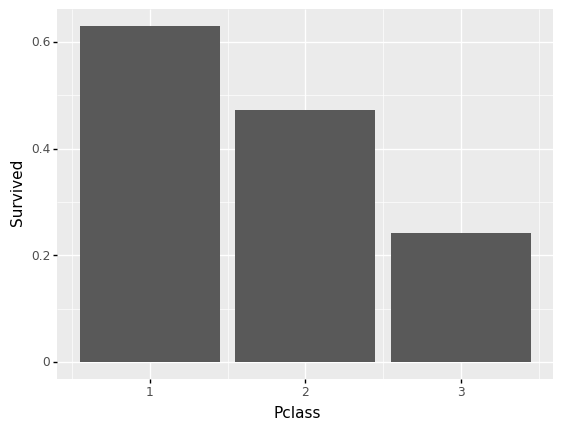

<ggplot: (378310075)>

In [6]:
import plotnine as p9

myplot = (p9.ggplot(titanic)              # 1. DATA         
    + p9.geom_bar(                        # 2. GEOMETRY, geom_*
        stat='stat_summary',
        mapping=p9.aes(x='Pclass', 
                       y='Survived')      # 3. AESTHETICS - relate variables to geometry
    )    
)

myplot

And further customization (_layers_) can be added to the specification, e.g.

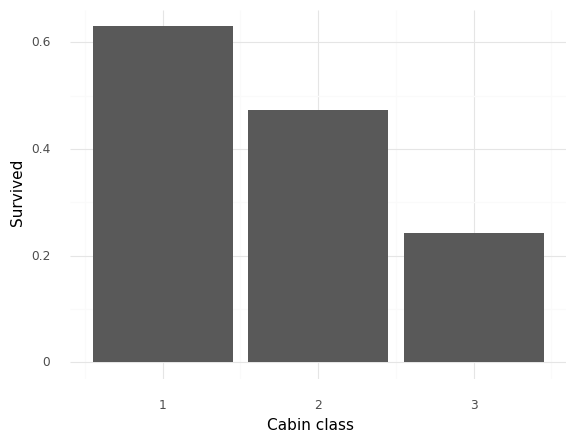

<ggplot: (378495175)>

In [7]:
import plotnine as p9

myplot = (p9.ggplot(titanic)              # 1. DATA         
    + p9.geom_bar(                        # 2. GEOMETRY, geom_*
        stat='stat_summary',
        mapping=p9.aes(x='Pclass', 
                       y='Survived')      # 3. AESTHETICS - relate variables to geometry
    )
    + p9.xlab("Cabin class")     # labels
    + p9.theme_minimal()              # theme
    # ...
)

myplot

As Plotnine is built on top of Matplotlib, one can still retrieve the Matplotlib `Figure` object from Plotnine for eventual customization.

The trick is to use the `.draw()` function in Plotnine:

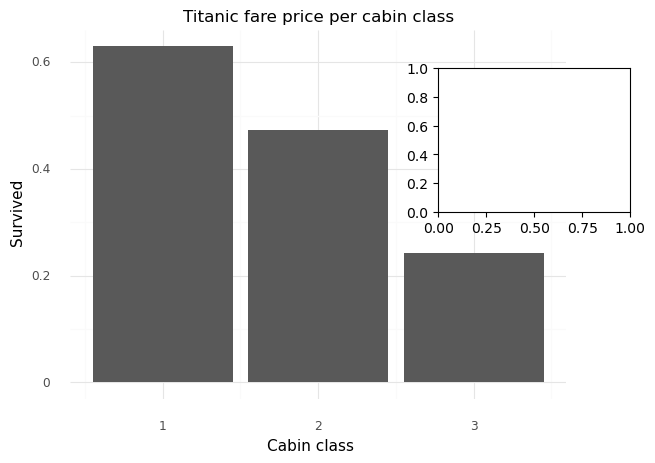

In [8]:
my_plt_version = myplot.draw();  # extract as Matplotlib Figure

# Do some Matplotlib magick...
my_plt_version.axes[0].set_title("Titanic fare price per cabin class")
ax2 = my_plt_version.add_axes([0.7, 0.5, 0.3, 0.3], label="ax2")

<div class="alert alert-info">

**REMEMBER**

- If you are already familiar to ggplot in R, the conversion of Plotnine will be easy.
- Plotnine is based on Matplotlib, making further customization possible as we have seen before.

</div>

### Altair

> *[Altair](https://altair-viz.github.io/) is a declarative statistical visualization library for Python, based on Vega-Lite.*

In [ ]:
import altair as alt

Altair implements the `Grammar of Graphics` with the same main ingredients, but a different syntax:

In [ ]:
(alt.Chart(titanic)                       # 1. DATA         
    .mark_bar()                           # 2. GEOMETRY, geom_*
    .encode(                              # 3. AESTHETICS - relate variables to geometry
        x=alt.X('Pclass:O', 
                axis=alt.Axis(title='Cabin class')),
        y=alt.Y('mean(Survived):Q', 
                axis=alt.Axis(format='%', 
                              title='Survival rate'))
    )
)

When encoding the variables for the chosen geometry, Altair provides a specific syntax on the data type of each variable. For information on this `...:Q`, `...:N`,`...:O`, see the [data type section](https://altair-viz.github.io/user_guide/encoding.html#encoding-data-types) of the documentation:

Data Type |	Shorthand Code |	Description
----------|-----------------|---------------
quantitative |		Q |		a continuous real-valued quantity
ordinal |		O |		a discrete ordered quantity
nominal |		N |		a discrete unordered category
temporal |		T |		a time or date value

Altair is made for the web, providing interactive features for the plots. See more examples [here](https://altair-viz.github.io/gallery/index.html#interactive-charts).

In [ ]:
brush = alt.selection(type='interval')

(alt.Chart(titanic)
     .mark_circle().encode( 
        x="Fare:Q",   
        y="Age:Q",
        column="Sex:O",
        color=alt.condition(brush, "Pclass:N", alt.value('grey')),
).add_selection(brush))

<div class="alert alert-info">

**Remember**

- Altair provides a pure-Python <b>Grammar of Graphics</b> implementation
- Altair is built on top of the <a href="https://vega.github.io/vega-lite/">Vega-Lite</a> visualization grammar, which can be interpreted as a language to specify a graph (from data to figure).
- Altair easily integrates with web-technology (HTML/Javascript).

</div>

## Interactivity and the web

Whereas Matplotlib/Seaborn/Plotnine are packages to create static charts, the charts created by Altair are mainly targeted to __integrate in websites and web applications__. 

With the increasing interest for interactive data visualization and dashboards, other packages were designed to fulfill this requirement. Both the [Bokeh](https://bokeh.org/) package and the [Plotly](https://plotly.com/python/) package can be used as a stand-alone data visualization tool or as part of web applications and dashboards.

__Note:__ Bokeh and Plotly are also the components for some packages to build interactive web applications, respectively [Panel](https://panel.holoviz.org/) and [Dash](https://dash.plotly.com/).

### Bokeh

> *[Bokeh](https://bokeh.pydata.org/en/latest/) is a Python interactive visualization library that targets modern web browsers for presentation*.

In [ ]:
from bokeh.plotting import figure, output_file, show

By default, Bokeh will open a new webpage to plot the figure. Still, an **integration with Jupyter notebooks** is provided:

In [ ]:
from bokeh.io import output_notebook

In [ ]:
output_notebook()

In [ ]:
p = figure()
p.line(x=[1, 2, 3], 
       y=[4,6,2])
show(p)

<div class="alert alert-danger">

__Warning__ 

- Bokeh does <b>not</b> support <code>eps</code>, <code>pdf</code> export of plots directly. Exporting to svg is available but still limited, see <a href="https://docs.bokeh.org/en/latest/docs/user_guide/export.html">documentation</a>.

</div>

To accomodate the users of **Pandas**, a `pd.DataFrame` can also be used as the input for a Bokeh plot:

In [ ]:
from bokeh.models import ColumnDataSource

flow_data = pd.read_csv("data/vmm_flowdata.csv", parse_dates=True, index_col=0)

source_data = ColumnDataSource(data=flow_data)

Useful to know when you want to use the index as well:
> *If the DataFrame has a named index column, then CDS will also have a column with this name. However, if the index name (or any subname of a MultiIndex) is None, then the CDS will have a column generically named index for the index.*

In [ ]:
p = figure(x_axis_type="datetime", plot_height=200, plot_width=600)
p.line(x='Time', y='LS06_347', source=source_data)
show(p)

Bokeh has lots of functionalities to adjust and customize charts, e.g. by adding new annotations to the figure object:

In [ ]:
from bokeh.models import ColumnDataSource, BoxAnnotation, Label

In [ ]:
p = figure(x_axis_type="datetime", plot_height=200, plot_width=600)
p.line(x='Time', y='L06_347', source=source_data)
p.circle(x='Time', y='L06_347', source=source_data, 
         fill_alpha= 0.3, line_alpha=0.3)

alarm_box = BoxAnnotation(bottom=10, fill_alpha=0.3, 
                          fill_color='#ff6666')  # arbitrary value; this is NOT the real-case value
p.add_layout(alarm_box)

alarm_label = Label(text="Flood risk", x_units='screen', 
                    x= 10, y=10, text_color="#330000")
p.add_layout(alarm_label)

show(p)

### hvplot/holoviews

> hvPlot provides an alternative for the static plotting API provided by Pandas and other libraries, with an interactive Bokeh-based plotting API that supports panning, zooming, hovering, and clickable/selectable legends

Similar to Matplotlib, Bokeh is a low-level package. Whereas Matplotlib provides the building blocks to define static plots, Bokeh provides the building blocks to create interactive visualizations. 

Just as Seaborn provides an abstraction on top of the Matplotlib package, the [hvplot](https://hvplot.holoviz.org/index.html) and [Holoviews](http://holoviews.org/index.html) packages provide an abstraction on top of Bokeh, i.e. plots with less code.

_Actually, hvplot is built on top of Holoviews, which is built on top of Bokeh_

In [ ]:
import hvplot.pandas

flow_data.hvplot()

The link in between hvplot/holoviews and Bokeh (for further adjustments) can be made using the `render` function:

In [ ]:
import holoviews as hv

fig = hv.render(flow_data.hvplot())
type(fig)

<div class="alert alert-info">

A similar advice as with Matplotlib: "do as much as you easily can in your convenience layer of choice [e.g. hvplot, GeoViews, Holoviews], use Bokeh for customization.
    
**More Bokeh?**

- Try the <a href="http://nbviewer.jupyter.org/github/bokeh/bokeh-notebooks/blob/master/quickstart/quickstart.ipynb">quickstart notebook</a> yourself and check the <a href="http://nbviewer.jupyter.org/github/bokeh/bokeh-notebooks/blob/master/tutorial/00%20-%20Introduction%20and%20Setup.ipynb">tutorials</a>
- Check the <a href="https://bokeh.pydata.org/en/latest/docs/gallery.html">Bokeh package gallery</a>
- <a href="https://bokeh.pydata.org/en/latest/docs/user_guide.html">Documentation</a> is very extensive...
    
</div>

### Plotly

> _[plotly.py](https://plot.ly/python/) is an interactive, browser-based graphing library for Python_

In [ ]:
import plotly

Similar to Bokeh, Plotly provides a lot of building blocks for interactive plotting, see https://plot.ly/python/#fundamentals. It consists of two main components: __plotly__ provides all the basic components (so called `plotly.graph_objects`) to create plots and __plotly express__ provides a high-level wrapper/abstraction around `plotly.graph_objects` for rapid data exploration and figure generation. The latter focuses more on _tidy_ data representation.

As an example: create a our example plot using the plotly `graph_objects`:

In [ ]:
import plotly.graph_objects as go

survival_rate = titanic.groupby("Pclass")['Survived'].mean().reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=survival_rate["Pclass"],
    y=survival_rate["Survived"])
)
fig.update_xaxes(type='category')
fig.update_layout(
    xaxis_title="Cabin class",
    yaxis_title="Survival rate")
fig.show()

Similar to other high-level interfaces, this can be done by `Plotly Express` as well, supporting direct interaction with a Pandas `DataFrame`:

In [ ]:
import plotly.express as px

# plotly express does not provide the count statistics out of the box, so calculating these
survival_rate = titanic.groupby("Pclass")['Survived'].mean().reset_index() 

fig = px.bar(survival_rate, x="Pclass", y="Survived")
fig.show()

<div class="alert alert-danger">

**Notice!** 

Prior versions of plotly.py contained functionality for creating figures in both "online" and "offline" modes. Since version 4 plotly is "offline"-only. Make sure you check the latest documentation and watch out with outdated Stackoverflow suggestions. The previous commercial/online version is rebranded into <a href='https://plot.ly/online-chart-maker/'>chart studio</a>.

</div>

The main interface to use plotly with Pandas is using Plotly Express:

In [ ]:
df = flow_data.reset_index()

fig = px.line(flow_data.reset_index(), x="Time", y=df.columns,
              hover_data={"Time": "|%B %d, %Y"}
             )
fig.show()

<div class="alert alert-info">

A similar advice as with Matplotlib/Bokeh: "do as much as you easily can in your convenience layer of choice [e.g. plotly express].
    
**More plotly?**   

- Check the <a href="https://plot.ly/python/">package gallery</a> for plot examples.
- Plotly express provides high level plotting functionalities and plotly graph objects the low level components.

</div>

<div class="alert alert-warning">

 <b>For R users...</b>: 
<br><br>
Both plotly and Bokeh provide interactivity (sliders,..), but are not the full equivalent of [`Rshiny`](https://shiny.rstudio.com/).<br>A similar functionality of Rshiny is provided by [`dash`](https://plot.ly/products/dash/), created by the same company as plotly.
<br>

</div>

## Change the default Pandas plotting backend

> _All slightly different syntax to create plots?!_

Different people have different preferences in terms of style/syntax/... So having alternatives is nice. However, Pandas also provides the option to work with different plotting packages without changing the syntax...

During the course, we used the `.plot()` method of Pandas to create charts, which relied on Matplotlib. Matplotlib is the default back-end for Pandas to create plots:

In [ ]:
pd.options.plotting.backend = 'matplotlib'
flow_data.plot()

However, Holoviews/hvplot, Bokeh and Plotly can be used as Pandas back-end for plotting, by defining the `pd.options.plotting.backend` variable:

In [ ]:
pd.options.plotting.backend = 'holoviews'
flow_data.plot()

In [ ]:
pd.options.plotting.backend = 'plotly'
flow_data.plot()

<div class="alert alert-info">

**Remember**

To get an interactive version of a plot created with Pandas, switch the `pd.options.plotting.backend` to `'holoviews'` or `'plotly'` and keep using the `.plot` function as before.

</div>

<div class="alert alert-warning">

**Warning**

When saving Jupyter notebooks with interactive visualizations in the output of multiple cells, the file size will increase a lot, making these files less suitable for version control. 
    
Consider saving your notebook with the outputs cleared (Menu > `Kernel` > `Restart kernel and clear all outputs...`) or automate this with a tool like [nbstripout](https://pypi.org/project/nbstripout/).

</div>

## Your data sets are HUGE?

When you are working with a lot of records, the visualization of the individual points does not always make sense as there are simply to many dots overlapping each other (check [this](https://datashader.org/user_guide/Plotting_Pitfalls.html) notebook for a more detailed explanation).

Consider the open data set:
> Bird tracking - GPS tracking of Lesser Black-backed Gulls and Herring Gulls breeding at the southern North Sea coast https://www.gbif.org/dataset/83e20573-f7dd-4852-9159-21566e1e691e with > 8e6 records

Working with such a data set on a local machine is not straightforward anymore, as this data set will consume a lot of memory to be handled by the default plotting libraries. Moreover, visualizing every single dot is not useful anymore at coarser zoom levels.

The package [datashader](https://datashader.org/) provides a solution for this size of data sets and works together with other packages such as `Bokeh` and `Holoviews`.

The data from [the gull data set](https://zenodo.org/record/3541812#.XfZYcNko-V6) is downloaded and stored it in the `data` folder and is not part of the Github repository. For example, after downloading the [2018 data set](https://zenodo.org/record/3541812/files/HG_OOSTENDE-gps-2018.csv?download=1) from Zenodo:

In [ ]:
import pandas as pd
import holoviews as hv
import hvplot.pandas 
from colorcet import fire

hv.extension('bokeh')

In [ ]:
df = pd.read_csv('data/HG_OOSTENDE-gps-2018.csv', nrows=1_000_000, # for the live demo on my laptop, I just use 1_000_000 points
                 usecols=['location-long', 'location-lat', 
                          'individual-local-identifier'])
df.head()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df.hvplot.points('location-long', 'location-lat', geo=True, tiles='ESRI', 
                 datashade=True, aggregator='count', cmap=fire, project=True,
                 xlim=(-5, 5), ylim=(48, 53), frame_width=600)

<div class="alert alert-info">

 <b>When not to use datashader</b>

 <ul>
    <li>Plotting less than 1e5 or 1e6 data points</li>
    <li>When every datapoint matters; standard Bokeh will render all of them</li>
    <li>For full interactivity (hover tools) with every datapoint</li>
 </ul>
<br>

 <b>When to use datashader</b>

 <ul>
    <li>Actual big data; when Bokeh/Matplotlib have trouble</li>
    <li>When the distribution matters more than individual points</li>
    <li>When you find yourself sampling or binning to better understand the distribution</li>
 </ul>
<br>

([source](http://nbviewer.jupyter.org/github/bokeh/bokeh-notebooks/blob/master/tutorial/A2%20-%20Visualizing%20Big%20Data%20with%20Datashader.ipynb))

</div>

<div class="alert alert-info">

 <b>More alternatives for large data set visualisation that are worthwhile exploring:</b>: 

 <ul>
    <li><a href="http://vaex.astro.rug.nl/">vaex</a> has a Pandas-like syntax and also provides on the fly binning or aggregating the data on a grid to be represented.</li>
    <li><a href="https://glumpy.github.io/">Glumpy</a> and <a href="http://vispy.org/">Vispy</a>, which both rely on <a href="https://www.opengl.org/">OpenGL</a> to achieve high performance</li>
</ul>
<br>

</div>

## You want to dive deeper into Python viz?

For a overview of the status of Python visualisation packages and tools, have a look at the [pyviz](https://pyviz.org) website.

In [ ]:
from IPython.display import Image
Image('https://raw.githubusercontent.com/rougier/python-visualization-landscape/master/landscape.png')

or check the interactive version [here](https://rougier.github.io/python-visualization-landscape/landscape-colors.html).

Further reading: http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833

<div class="alert alert-info">

 <b>Remember - Check the package galleries</b>: 

- <a href="https://matplotlib.org/gallery.html">Matplotlib gallery</a>.
- <a href="http://seaborn.pydata.org/examples/">Seaborn gallery</a>.
- <a href="http://plotnine.readthedocs.io/en/stable/gallery.html">Plotnine gallery</a> and <a href="https://www.r-graph-gallery.com/portfolio/ggplot2-package/">R ggplot2 gallery</a>.
- An overview based on the type of graph using Python is given <a href="https://python-graph-gallery.com/">here</a>.

</div>

## Acknowledgements


- https://speakerdeck.com/jakevdp/pythons-visualization-landscape-pycon-2017